In [0]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import tensorflow as tf 
from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold



### Read File

In [0]:
diabetes_set = pd.read_csv("datos/diabetes.csv")

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,Y
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0


### Feature

In [0]:
X = diabetes_set.drop(["Y"],axis = 1)
y = diabetes_set["Y"]

### Select From Model 

In [0]:
predictor = ExtraTreesClassifier()
predictor.fit(X, y)
model = SelectFromModel(predictor, threshold=0.11, prefit=True)
X_new = model.transform(X) 
selection = model.get_support()
num_selected_features = np.count_nonzero(selection)

print(selection,"\n")
print("Numero de características seleccionadas: ",num_selected_features)

### Variables significativas respecto estadistico T

In [0]:
x_sm = sm.add_constant(diabetes_set.drop("Y",axis=1))
model = sm.OLS(diabetes_set["Y"], x_sm)
results = model.fit()
pd.DataFrame(results.tvalues)

,0
const,59.061427
age,-0.167570
sex,-3.917184
bmi,7.813196
bp,4.958435
s1,-1.901163
s2,1.406187
s3,0.475431
s4,1.096538
s5,4.370394


In [0]:
x_sm = sm.add_constant(diabetes_set.drop(["Y","age"],axis=1))
model = sm.OLS(diabetes_set["Y"], x_sm)
results = model.fit()
pd.DataFrame(results.tvalues)

,0
const,59.127978
sex,-3.957639
bmi,7.823107
bp,5.023787
s1,-1.900534
s2,1.401996
s3,0.470042
s4,1.100334
s5,4.373286
s6,1.012756


In [0]:
x_sm = sm.add_constant(diabetes_set.drop(["Y","age","s3"],axis=1))
model = sm.OLS(diabetes_set["Y"], x_sm)
results = model.fit()
pd.DataFrame(results.tvalues)

,0
const,59.181242
sex,-3.984963
bmi,7.818292
bp,5.017619
s1,-3.031346
s2,1.602949
s4,1.054337
s5,5.777892
s6,1.029069


**Resumen de selección de características:**

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6',]

*  método 1: No sirivió mucho el método

*  método 2: [2 4 1 1 5 6 1 1 1 3]

* método 3: [ True, False,  True,  True, False,  True,  True, False,  True, True])

* método 4: "age","s3"

## Modelo RL

MAE: 45.852215383892016
MSE: 3319.8487104978667
RMSE: 57.618128314774914 

MAE: 46.17886418209579
MSE: 3318.6295993871945
RMSE: 57.607548111225796 

MAE: 45.967979334993935
MSE: 3350.1952123709443
RMSE: 57.88087086741996 



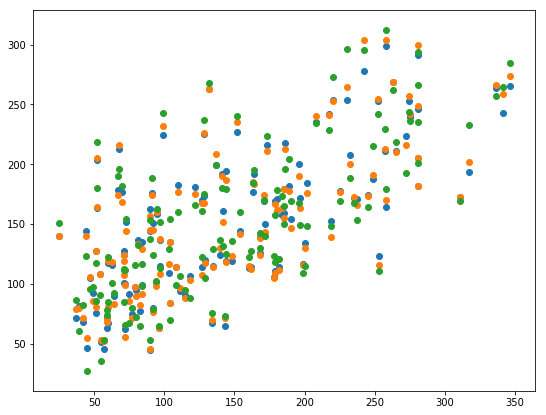

In [0]:
# esta lista contiene las variables a borrar por cada método
grid_features = [["age","sex","s1","s2","s6","Y"],["sex","s1","s4","Y"],["age","s3","Y"]]
resultados_regresion = []
plt.figure(figsize=(9,7))

def regression(lista_variables): 
    X_train, X_test, y_train, y_test = train_test_split(diabetes_set.drop(lista_variables,axis=1),diabetes_set["Y"] , test_size=0.3, random_state=101)
    lm = LinearRegression()
    lm.fit(X_train,y_train)
    predictions = lm.predict(X_test)   
    plt.scatter(y_test,predictions)   
    resultados_regresion.append([metrics.mean_absolute_error(y_test, predictions),
                                 metrics.mean_squared_error(y_test, predictions),
                                 np.sqrt(metrics.mean_squared_error(y_test, predictions))])    
    print('M.A.E:', metrics.mean_absolute_error(y_test, predictions))
    print('M.S.E:', metrics.mean_squared_error(y_test, predictions))
    print('R.M.S.E:', np.sqrt(metrics.mean_squared_error(y_test, predictions)),"\n")
    

for i in grid_features:
    regression(i)
    

## Regresion lineal con RN

#### 1: Api.estimator de TensorFlow 

In [0]:
X_train, X_test, y_train, y_test = train_test_split(diabetes_set.drop(["Y"],axis=1),
                                                    diabetes_set["Y"],
                                                    test_size=0.2,
                                                    random_state=101)

X_train.columns

Index(['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6'], dtype='object')

In [0]:
#column features (numéricas)
age = tf.feature_column.numeric_column('age')
sex = tf.feature_column.numeric_column('sex')
bmi = tf.feature_column.numeric_column('bmi')
bp = tf.feature_column.numeric_column('bp')
s1 = tf.feature_column.numeric_column('s1')
s2 = tf.feature_column.numeric_column('s2')
s3 = tf.feature_column.numeric_column('s3')
s4 = tf.feature_column.numeric_column('s4')
s5 = tf.feature_column.numeric_column('s5')
s6 = tf.feature_column.numeric_column('s6')

In [0]:
feat_cols = [age,sex, bmi, bp, s1, s2, s3, s4, s5, s6]
# Entrada entrenamiento
input_func = tf.estimator.inputs.pandas_input_fn(x=X_train,
                                                 y=y_train ,
                                                 batch_size=10,
                                                 num_epochs=3000,
                                                 shuffle=True)

# se supone red de 5 capas ocultas, se busca optimo de neuronas
neuronas_por_capa = [2,4,8,16,32,64]

In [0]:
history_neuron = []

for i in neuronas_por_capa:
    model = tf.estimator.DNNRegressor(hidden_units=[i,i,i,i,i],feature_columns=feat_cols)
    model.train(input_fn=input_func,steps=5000)
    predict_input_func = tf.estimator.inputs.pandas_input_fn(
        x=X_test,
        batch_size=10,
        num_epochs=1,
        shuffle=False)
    pred_gen = model.predict(predict_input_func)
    predictions = list(pred_gen)
    final_preds = []
    for pred in predictions:
        final_preds.append(pred['predictions'])   
    history_neuron.append(mean_squared_error(y_test,final_preds))
    
# error
plt.figure(figsize=(10,5))
plt.xlabel('Neuronas por capa')
plt.title("MSE por # de neuronas por capa")
plt.plot(neuronas_por_capa, history_neuron, 'ko-')
plt.grid()

In [0]:
# seleccionamos el valor de 8 y ahora vamos a tuner el número de capas ocultas
capas = [[8],[8,8],[8,8,8],[8,8,8,8],[8,8,8,8,8],[8,8,8,8,8,8]]

In [0]:
history_layers = []
for i in capas:
    model = tf.estimator.DNNRegressor(hidden_units=i,feature_columns=feat_cols)
    model.train(input_fn=input_func,steps=5000)
    predict_input_func = tf.estimator.inputs.pandas_input_fn(
        x=X_test,
        batch_size=10,
        num_epochs=1,
        shuffle=False)
    pred_gen = model.predict(predict_input_func)
    predictions = list(pred_gen)
    final_preds = []
    for pred in predictions:
        final_preds.append(pred['predictions'])
    history_layers.append(mean_squared_error(y_test,final_preds))

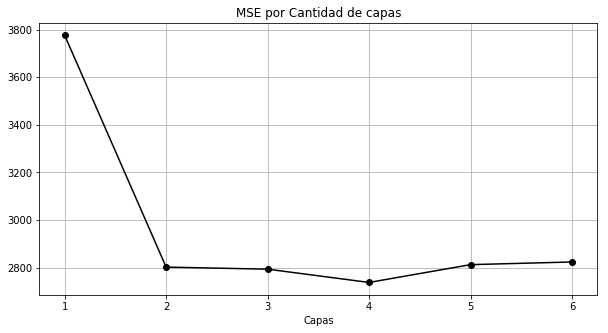

In [0]:
plt.figure(figsize=(10,5))
plt.xlabel('Capas')
plt.title("MSE por Cantidad de capas")
plt.plot([1,2,3,4,5,6], history_layers, 'ko-')
plt.grid()

**Entrenamiento del modelo con los dos hyperparámetros más óptimos, 2 capas ocultas de 8 neuronas **

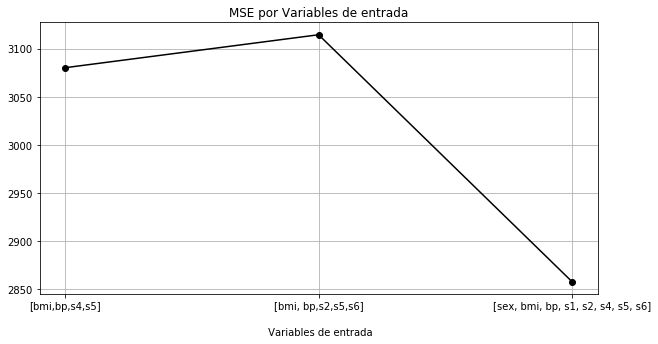

In [0]:
lista_feat_cols = [[bmi,bp,s4,s5],[bmi, bp,s2,s5,s6],[sex, bmi, bp, s1, s2, s4, s5, s6]]
plt.figure(figsize=(10,5))
plt.xlabel('\n entradas')
plt.title("MSE")
plt.plot(["[bmi,bp,s4,s5]","[bmi, bp,s2,s5,s6]","[sex, bmi, bp, s1, s2, s4, s5, s6]"], history_layers, 'ko-')


plt.grid()

#### Modelo final con Api.estimator:
     * Variables          [sex, bmi, bp, s1, s2, s4, s5, s6]
     * Capas              2
     * Neuronas por capa  8

In [0]:
tf.reset_default_graph()
feat_cols = [sex, bmi, bp, s1, s2, s4, s5, s6]
model = tf.estimator.DNNRegressor(hidden_units=[8,8],feature_columns=feat_cols)
model.train(input_fn=input_func,steps=5000)
predict_input_func = tf.estimator.inputs.pandas_input_fn(
      x=X_test,
      batch_size=10,
      num_epochs=1,
      shuffle=False)
pred_gen = model.predict(predict_input_func)
predictions = list(pred_gen)
final_preds = []
for pred in predictions:
    final_preds.append(pred['predictions'])

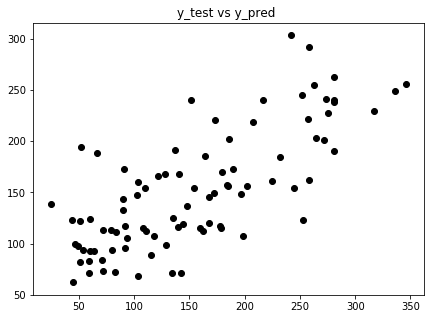

In [0]:
plt.figure(figsize=(7,5))
plt.title("y_test vs y_pred ")
plt.scatter(y_test,final_preds,color="black")

In [0]:
mae_nn =  metrics.mean_absolute_error(y_test, final_preds)
mse_nn =  metrics.mean_squared_error(y_test, final_preds)
rmse_nn = np.sqrt(metrics.mean_squared_error(y_test, final_preds))

print(mae_nn,mse_nn,rmse_nn)

43.77722643734364 2852.755997456919 53.41119730409457


In [0]:
resultados_tf_estimator = [mae_nn,mse_nn,rmse_nn]

### C.V

In [0]:
X = diabetes_set.drop(["Y"],axis = 1).values
y = diabetes_set["Y"].values
def cross_validation(train_index, test_index,X,y):    
    
    X_train, X_test = pd.DataFrame(X[train_index]), pd.DataFrame(X[test_index])
    y_train, y_test = pd.DataFrame(y[train_index]), pd.DataFrame(y[test_index])
    
    X_train.columns = ['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']
    X_test.columns = X_train.columns = ['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']
    #y_train.columns = ["Y"]
    #y_test.columns = ["Y"]
    
    sex = tf.feature_column.numeric_column('sex')
    bmi = tf.feature_column.numeric_column('bmi')
    bp = tf.feature_column.numeric_column('bp')
    s1 = tf.feature_column.numeric_column('s1')
    s2 = tf.feature_column.numeric_column('s2')
    s4 = tf.feature_column.numeric_column('s4')
    s5 = tf.feature_column.numeric_column('s5')
    s6 = tf.feature_column.numeric_column('s6')

    feat_cols = [sex, bmi, bp, s1, s2,s4, s5, s6]

    input_func = tf.estimator.inputs.pandas_input_fn(x=X_train,
                                                     y= y_train[0],
                                                     batch_size=10,
                                                     num_epochs=3000,
                                                     shuffle=False)
    
    model = tf.estimator.DNNRegressor(hidden_units=[4,4,4],feature_columns=feat_cols)

    model.train(input_fn=input_func,steps=5000)

    predict_input_func = tf.estimator.inputs.pandas_input_fn(
        x=X_test,
        batch_size=10,
        num_epochs=1,
        shuffle=False)

    pred_gen = model.predict(predict_input_func)

    predictions = list(pred_gen)

    final_preds = []

    for pred in predictions:
        final_preds.append(pred['predictions'])   

    return metrics.mean_squared_error(y_test, final_preds)
   

In [0]:
kf = KFold(n_splits=4)

resultado_cross = []

for train_index, test_index in kf.split(X):    

    resultado_cross.append(cross_validation(train_index,test_index,X,y))

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\andre\\AppData\\Local\\Temp\\tmppozcbgj8', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x000002FB3866A9B0>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create Checkp

INFO:tensorflow:global_step/sec: 709.616
INFO:tensorflow:loss = 44717.812, step = 301 (0.140 sec)
INFO:tensorflow:global_step/sec: 637.315
INFO:tensorflow:loss = 85213.44, step = 401 (0.158 sec)
INFO:tensorflow:global_step/sec: 680.663
INFO:tensorflow:loss = 61335.66, step = 501 (0.145 sec)
INFO:tensorflow:global_step/sec: 671.525
INFO:tensorflow:loss = 38081.35, step = 601 (0.150 sec)
INFO:tensorflow:global_step/sec: 709.673
INFO:tensorflow:loss = 36283.754, step = 701 (0.143 sec)
INFO:tensorflow:global_step/sec: 679.52
INFO:tensorflow:loss = 29548.28, step = 801 (0.146 sec)
INFO:tensorflow:global_step/sec: 709.674
INFO:tensorflow:loss = 22497.074, step = 901 (0.141 sec)
INFO:tensorflow:global_step/sec: 709.565
INFO:tensorflow:loss = 54794.438, step = 1001 (0.140 sec)
INFO:tensorflow:global_step/sec: 676.073
INFO:tensorflow:loss = 47733.453, step = 1101 (0.149 sec)
INFO:tensorflow:global_step/sec: 658.557
INFO:tensorflow:loss = 26108.582, step = 1201 (0.151 sec)
INFO:tensorflow:global

INFO:tensorflow:global_step/sec: 595.534
INFO:tensorflow:loss = 39734.65, step = 1901 (0.170 sec)
INFO:tensorflow:global_step/sec: 592.1
INFO:tensorflow:loss = 18140.262, step = 2001 (0.169 sec)
INFO:tensorflow:global_step/sec: 621.427
INFO:tensorflow:loss = 25827.498, step = 2101 (0.160 sec)
INFO:tensorflow:global_step/sec: 629.295
INFO:tensorflow:loss = 36100.586, step = 2201 (0.158 sec)
INFO:tensorflow:global_step/sec: 549.795
INFO:tensorflow:loss = 37198.465, step = 2301 (0.182 sec)
INFO:tensorflow:global_step/sec: 613.813
INFO:tensorflow:loss = 45515.086, step = 2401 (0.162 sec)
INFO:tensorflow:global_step/sec: 581.707
INFO:tensorflow:loss = 43997.836, step = 2501 (0.173 sec)
INFO:tensorflow:global_step/sec: 468.944
INFO:tensorflow:loss = 39444.46, step = 2601 (0.215 sec)
INFO:tensorflow:global_step/sec: 595.573
INFO:tensorflow:loss = 36060.105, step = 2701 (0.166 sec)
INFO:tensorflow:global_step/sec: 633.241
INFO:tensorflow:loss = 31090.178, step = 2801 (0.159 sec)
INFO:tensorflo

INFO:tensorflow:global_step/sec: 637.308
INFO:tensorflow:loss = 28661.922, step = 3501 (0.158 sec)
INFO:tensorflow:global_step/sec: 636.936
INFO:tensorflow:loss = 35304.324, step = 3601 (0.155 sec)
INFO:tensorflow:global_step/sec: 626.706
INFO:tensorflow:loss = 43343.523, step = 3701 (0.162 sec)
INFO:tensorflow:global_step/sec: 629.289
INFO:tensorflow:loss = 30218.307, step = 3801 (0.157 sec)
INFO:tensorflow:global_step/sec: 629.293
INFO:tensorflow:loss = 27705.705, step = 3901 (0.160 sec)
INFO:tensorflow:global_step/sec: 629.328
INFO:tensorflow:loss = 22316.531, step = 4001 (0.159 sec)
INFO:tensorflow:global_step/sec: 629.277
INFO:tensorflow:loss = 20439.89, step = 4101 (0.160 sec)
INFO:tensorflow:global_step/sec: 599.125
INFO:tensorflow:loss = 20029.848, step = 4201 (0.166 sec)
INFO:tensorflow:global_step/sec: 641.389
INFO:tensorflow:loss = 16544.32, step = 4301 (0.155 sec)
INFO:tensorflow:global_step/sec: 628.046
INFO:tensorflow:loss = 25158.676, step = 4401 (0.160 sec)
INFO:tensorf

In [0]:
print("MSE Cross validation: ", np.array(resultado_cross).sum()/len(resultado_cross))

MSE Cross validation:  3058.5087658175407
